In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import files


uploaded = files.upload()


Saving laptop_data.csv to laptop_data.csv


In [3]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['laptop_data.csv']))
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Dropping the first unnamed column
data = data.iloc[:, 1:]

# Display the first few rows
print(data.head())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86

In [5]:
# EDA - Checking for missing values and data types
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB
None
            Inches          Price
count  1303.000000    1303.000000
mean     15.017191   59870.042910
std       1.426304   37243.201786
min      10.100000    9270.720000
25%      14.000000   31914.720000
50%      15.600000 

In [7]:
# Removing units from 'Ram' and 'Weight' columns
data['Ram'] = data['Ram'].str.replace('GB', '').astype(int)
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)


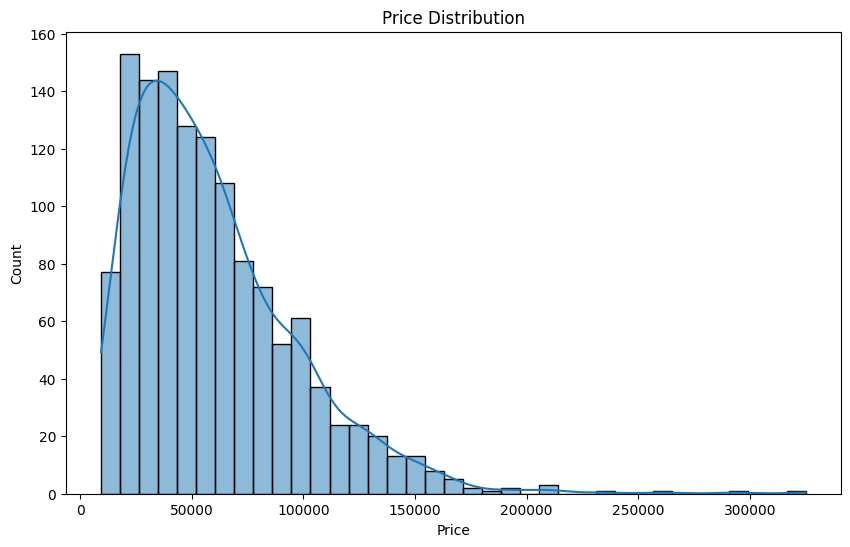

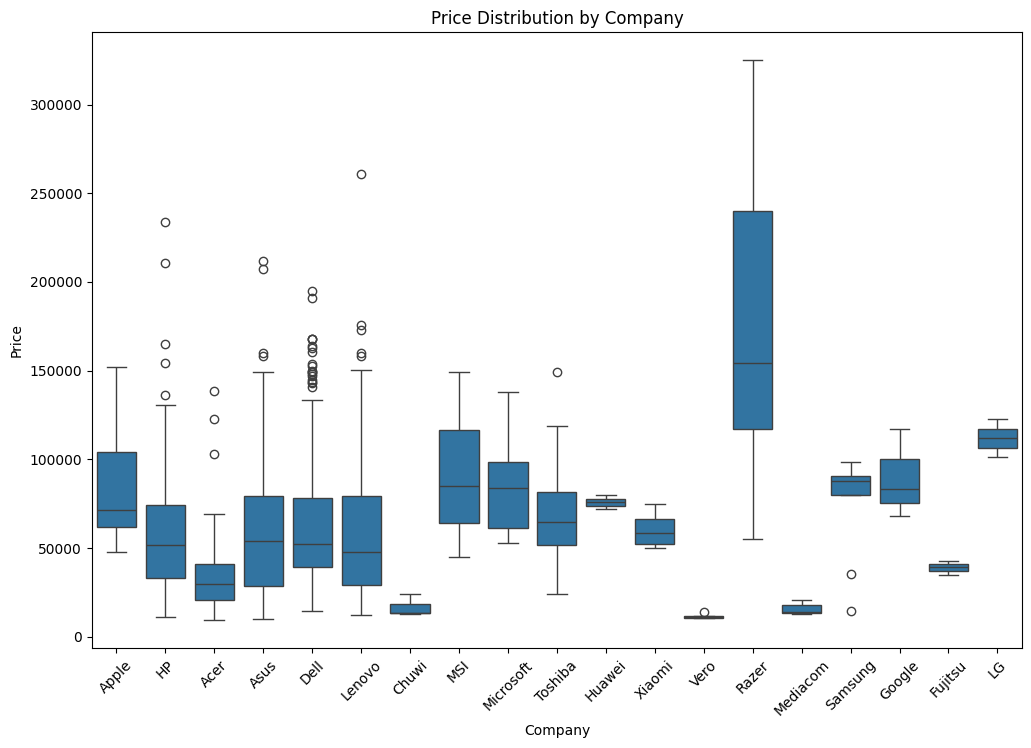

In [8]:
# Analyzing the distribution of 'Price' and other features
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Analyzing categorical features
plt.figure(figsize=(12, 8))
sns.boxplot(x='Company', y='Price', data=data)
plt.title('Price Distribution by Company')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Encoding categorical variables
categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys','Memory']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
data = pd.concat([data, encoded_df], axis=1)
data = data.drop(columns=categorical_features)
# Function to convert memory sizes to a numeric format (in GB)



In [10]:
# Splitting the data
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost Regression": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")

Linear Regression - MAE: 170085988647582912.00, MSE: 1030817519357450691123863917898498048.00
Support Vector Regression - MAE: 26408.09, MSE: 1484117982.05
Decision Tree Regression - MAE: 13379.10, MSE: 439054603.95
Random Forest Regression - MAE: 10336.02, MSE: 290287911.74
XGBoost Regression - MAE: 9635.15, MSE: 274664832.66


In [21]:
# Deep Learning Models - ANN
def build_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(44, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(48, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(52, activation='relu'))
    model.add(Dense(44, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

# Compile and train the ANN model
ann_model = build_ann_model(X_train.shape[1])
ann_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Training ANN model
history1 = ann_model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=32, verbose=1)
# ANN Model Evaluation
ann_pred = ann_model.predict(X_test)
ann_mae = mean_absolute_error(y_test, ann_pred)
ann_mse = mean_squared_error(y_test, ann_pred)
print(f"ANN - MAE: {ann_mae:.2f}, MSE: {ann_mse:.2f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 3949475072.0000 - val_loss: 1029734080.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 564008704.0000 - val_loss: 717065408.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 258969056.0000 - val_loss: 658692992.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 189708176.0000 - val_loss: 560382656.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151619888.0000 - val_loss: 514928768.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111400704.0000 - val_loss: 526811456.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 130617120.0000 - val_loss: 510379072.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103833624.0000 - val_loss: 507463168.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81984672.0000 - val_loss: 509676608.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84280168.0000 - val_loss: 489665568.0000


In [22]:
# Deep Learning Models - RNN
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(Dense(44, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(48, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(52, activation='relu'))
    model.add(Dense(44, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

# Compile and train the RNN model
rnn_model = build_rnn_model(X_train.shape[1])
rnn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Training RNN model
history = rnn_model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=32, verbose=1)

# RNN Model Evaluation
rnn_pred = rnn_model.predict(X_test)
rnn_mae = mean_absolute_error(y_test, rnn_pred)
rnn_mse = mean_squared_error(y_test, rnn_pred)
print(f"RNN - MAE: {rnn_mae:.2f}, MSE: {rnn_mse:.2f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 4160849664.0000 - val_loss: 1269546368.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 721539520.0000 - val_loss: 734517824.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 300604256.0000 - val_loss: 724081664.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 249053120.0000 - val_loss: 601022464.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151798256.0000 - val_loss: 523174560.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103381888.0000 - val_loss: 505307776.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100432760.0000 - val_loss: 496819552.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83655016.0000 - val_loss: 494580672.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89225616.0000 - val_loss: 481139136.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131218544.0000 - val_loss: 445887392.0000


In [23]:
from sklearn.metrics import r2_score

# Initializing dictionary to store model names and their metrics
model_performance = {
    "Model": [
        "Simple Linear Regression", "SVM Regression", "Decision Tree Regression",
        "Random Forest Regression", "XG Boost Regression",
        "Artificial Neural Network (ANN)", "Recurrent Neural Network (RNN)"
    ],
    "MAE": [],
    "R-squared score": []
}

# Calculate metrics for each model and append to the dictionary
# Linear Regression
y_pred_lr = models["Linear Regression"].predict(X_test)
model_performance["MAE"].append(mean_absolute_error(y_test, y_pred_lr))
model_performance["R-squared score"].append(r2_score(y_test, y_pred_lr))

# Support Vector Regression
y_pred_svr = models["Support Vector Regression"].predict(X_test)
model_performance["MAE"].append(mean_absolute_error(y_test, y_pred_svr))
model_performance["R-squared score"].append(r2_score(y_test, y_pred_svr))

# Decision Tree Regression
y_pred_dt = models["Decision Tree Regression"].predict(X_test)
model_performance["MAE"].append(mean_absolute_error(y_test, y_pred_dt))
model_performance["R-squared score"].append(r2_score(y_test, y_pred_dt))

# Random Forest Regression
y_pred_rf = models["Random Forest Regression"].predict(X_test)
model_performance["MAE"].append(mean_absolute_error(y_test, y_pred_rf))
model_performance["R-squared score"].append(r2_score(y_test, y_pred_rf))

# XG Boost Regression
y_pred_xgb = models["XGBoost Regression"].predict(X_test)
model_performance["MAE"].append(mean_absolute_error(y_test, y_pred_xgb))
model_performance["R-squared score"].append(r2_score(y_test, y_pred_xgb))

# ANN Model
model_performance["MAE"].append(ann_mae)
model_performance["R-squared score"].append(r2_score(y_test, ann_pred))

# RNN Model
model_performance["MAE"].append(rnn_mae)
model_performance["R-squared score"].append(r2_score(y_test, rnn_pred))

# Creating a DataFrame to display the results
performance_df = pd.DataFrame(model_performance)

# Displaying the performance table
print("Performance of the Models based on the Mean Absolute Error and R2 Score")
print(performance_df)



Performance of the Models based on the Mean Absolute Error and R2 Score
                             Model           MAE  R-squared score
0         Simple Linear Regression  1.700860e+17    -7.149118e+26
1                   SVM Regression  2.640809e+04    -2.929320e-02
2         Decision Tree Regression  1.337910e+04     6.954987e-01
3         Random Forest Regression  1.033602e+04     7.986741e-01
4              XG Boost Regression  9.635154e+03     8.095093e-01
5  Artificial Neural Network (ANN)  1.041427e+04     8.333022e-01
6   Recurrent Neural Network (RNN)  1.040165e+04     8.399680e-01
